# Part 1 (Paper is linked [here](https://core.ac.uk/download/pdf/212982419.pdf))
## Background info on fantasy football
- In fantasy football, each manager (person playing in a league) drafts a team of NFL football players to be on their roster. 
    - This roster scores "fantasy points" every week based on how well the players on that roster perform.
    - Each roster is made up of a starting lineup and a bench, similar to how an NFL team works.   

* Performance metrics for each type of player (quarterback, wide receiver, etc.) are converted into one common metric (fantasy points) so that each fantasy team's performance can be displayed using a single metric.

    - For example, the standard performance -> points conversion for quarterback scoring is as follows:\
    Points = (Yards Thrown) * 0.04 + (touchdowns (TDs) scored by throwing) * 4 + (Yards Run) * 0.1 + (TDs scored by running) * 6 - (Interceptions) * 2

    * So a quarterback who threw for 200 yards and 2TDs would receive `200 * 0.04 + 2 * 4 = 16` fantasy points\
    While a quarterback who threw for 300 yards and 4TDs would receive `300 * 0.04 + 4 * 4 = 28` fantasy points (better performance = more points)

- Fantasy football is typically played in a weekly, head-to-head format. 
    - Managers face off in "matchups" each week against another manager (again, similar to the NFL). At the end of a given week's games, the manager whose starting lineup scored the most fantasy points wins the matchup.

* Many sites offer "projections" of how many fantasy points a given player is expected to score in a given week, which can help managers select which players to put into their starting lineups. 
- A key problem for many managers/sites is determining how accurate these projections are, since selecting the right players to start can either win or lose a weekly matchup for a manager

## Section 1 
#### What question was the author trying to answer?
These authors wanted to evaluate how well the proprietary model they were investigating could project the number of fantasy points scored by quarterbacks (QBs) and team defense/special teams units (D/STs), which are two different fantasy football position groups. They also wanted to determine if the model's projections of fantasy points improved over the course of the season, so they collected projection data for each week of the season.
#### Describe the data:
This data includes quarterback and team defense fantasy football projections by a proprietary model ([Advanced Sports Logic's "The Machine"](https://advancedsportslogic.com/nfl)) and how many fantasy points the players the model projected actually scored for each week of the 2012 NFL season. This dataset is comprised of 2 separate excel sheets, one that tracks quarterback fantasy projections/points and another that tracks team defense fantasy projections/points

#### What are the observations? How were they collected?
The observations are weeks of the fantasy football 'season'. The authors divided up the fantasy footbal season into a 5-week `preseason` phase where managers would be doing their fantasy footbal drafts, and a 16-week `NFL season` phase with **weekly** matchups. For each week in this 21-week time frame, the authors collected the model's fantasy point projections for the QBs and D/STs in the model. For each week of the `NFL season` phase, they also collected data on how many points each player actually scored.

All that would be involved in the data collection would be retrieving the model's projections **before** the start of the week's NFL games, and retrieving the fantasy points each player scored **after** the start of the week's NFL games.

#### What are the features?
The features are projected fantasy points scored and actual fantasy points scored (except for `preseason` phase data, which would only include data on the projected fantasy points). This discrepancy is because no regular season NFL football is being played during the `preseason` phase, so there are no fantasy points actually being scored.

The other key features were the position and name of the player being tracked (e.g. QB Tom Brady). This allowed the authors to determine if there were any outlier data points that might be skewing their assessment of the model's accuracy.
- One example of a situation where this might be relevant is a mid-season injury. 
- Let's say that QB `A` projects to score 18.0 fantasy points in a given week. In week 8, he gets injured and is replaced by QB `B` the following week
- The model uses QB `A`'s projections to project QB `B`'s fantasy points for week 9 (since QB `A` and QB `B` play for the same team, and thus the same offense)
- QB `B` is actually a much worse QB than QB `A`, however, and only scores 12 fantasy points
- The model then adjusts its projections to accomodate for this drop in performance, and does a good job of projecting QB `B` for the remainder of the season

In this case, what should the authors do with QB `B`'s week 9 projection? Is it a fair assumption that fantasy football managers wouldn't trust the site's projections for that week, or should they keep that data point in the model?

#### What other data or knowledge was used?
The team that each player played for, as well as a unique playerID. These were not used as features in this study, since the accuracy of the model's projections were assumed to be team- and player-agnostic. They could be useful, however, for identifying outliers, as in the situation above.

#### What's another question the author could have asked?
Is there a correlation between team defensive fantasy points scored and quarterback fantasy points scored? 
- In fantasy football, defenses are typically drafted on a team level. For example, I might play the `New England Patriots` D/ST
- If the authors had decided to ask this question, they could have matched up which D/STs matched the `Team` column for each quarterback
- Then, they could've used fantasy points scored to determine if there was a correlation between quarterback fantasy points scored and team defense fantasy points scored

In [2]:
# import packages and dataset
import pandas as pd

QB = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name='QB Projections')
DST = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name= 'DST Projections')

c:\Users\sjcde\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sjcde\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\sjcde\anaconda3\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
# How many unique observations (weeks) are there?
# 21, derived from 16 weeks of the NFL season, plus 5 weeks for preseason

# How many features are there?
# 4! There's projected fantasy points scored, actual fantasy points scored, position, and player

# Print out the dataset
display(QB.head())
display(DST.head())

# Helpful dataset notes
# ORDER = week of the NFL season
# Columns (2013-06-10, 2013-08-09, etc.) = projections at a given time point.
    # Projections beyond a given week of the NFL season would be meaningless, since the game the model was projecting would've already happened
    # Therefore, projections for any week after the game has already been played is a NaN in this dataset
# Actuals = actual fantasy points scored
# PLAYERID assigns a unique identifier to each PLAYER
# ID combines the information from ORDER with the PLAYERID data


,ORDER,1,ID,PLAYERID,PLAYER,TEAM,Actuals,2013-06-10 00:00:00,2013-08-09 00:00:00,2013-08-16 00:00:00,...,2013-10-25 00:00:00,2013-11-01 00:00:00,2013-11-08 00:00:00,2013-11-15 00:00:00,2013-11-22 00:00:00,2013-11-29 00:00:00,2013-12-06 00:00:00,2013-12-13 00:00:00,2013-12-20 00:00:00,Variation
0,1,2,1428-1,1428,Peyton Manning,DEN,18.42,13.6,14.1,14.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064000
1,1,3,1575-1,1575,Matt Hasselbeck,TEN,1.72,11.5,3.5,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.165667
2,1,4,2330-1,2330,Tom Brady,NE,17.54,20.8,20.4,20.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.690667
3,1,5,2549-1,2549,Michael Vick,PHI,17.88,18.4,19.2,19.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097667
4,1,6,2580-1,2580,Drew Brees,NO,21.56,21.2,20.1,19.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320000


,ESPNID,PLAYER,TEAM,ORDER,Actuals,2013-06-10 00:00:00,2013-08-09 00:00:00,2013-08-16 00:00:00,2013-08-23 00:00:00,2013-08-30 00:00:00,...,2013-10-25 00:00:00,2013-11-01 00:00:00,2013-11-08 00:00:00,2013-11-15 00:00:00,2013-11-22 00:00:00,2013-11-29 00:00:00,2013-12-06 00:00:00,2013-12-13 00:00:00,2013-12-20 00:00:00,Variation
0,60001,Atlanta Falcons,ATL,1,9,9.7,9.7,9.9,10.2,10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072000
1,60002,Buffalo Bills,BUF,1,-2,12.8,11.6,11.6,11.9,12.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223000
2,60003,Chicago Bears,CHI,1,13,17.9,18.2,19.4,18.8,17.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633667
3,60004,Cincinnati Bengals,CIN,1,1,8.4,8.5,8.7,8.6,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061667
4,60005,Cleveland Browns,CLE,1,29,4.2,7.1,6.9,7.1,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413667


## Section 2
### Figure 1
#### How was it generated?
To express how well their proprietary model was projecting fantasy points scored, the authors created a `projection score` metric that ranged from 0 to 100, with 0 being a poor projection that was far away from the number of points scored, and 100 being a perfect projection. 

This figure examines the `projection score` that a score that was x% away from the actual number of fantasy points scored would be given.

In other words, the authors were trying to develop a way to grade how good their projections were, on a scale from 0 to 100.

They tested the grading system by feeding it fake data that was some % away from the actual fantasy points scored
- Let's say the actual number of points scored was 10. The authors would have fed 10, 10.5 (5% error), 11 (10% error), etc. into their grading system, and seen what came out
- They expected that a score of 5% error would be a 90, 10% error would be an 80, and so on. 

#### What are the axes?
The x-axis is the % error (the difference between actual fantasy points scored and projected points scored) and the y-axis is the `projection score`, from 0 to 100
#### What are the datapoints?
Each data point is an (x, y) pair of what score a projection with a given amount of error would receive using the authors' rating system
#### Why did the authors include this figure?
The authors included this figure to show how the first iteration of their `projection score` metric performed. They were unhappy that the model rated projections that were close to the actual number of points scored (within 5%, +/- 1 fantasy point per 20 fantasy points scored) as a 63.81/100 (which was too low). They then described a series of improvements that they made to the metric to help the `projection score` more closely match their expectations (with projections within 5% of the real value receiving scores in the 90s)

#### What can we conclude from this figure?
The first iteration of the authors' `projection score` metric resulted in low ratings of projections across the board. While increasing how far away from the actual value a projection was did result in a worse score (which makes sense in terms of evaluating a model's accuracy), even a projection with a 5% error only received a 63.8/100.

In [4]:
# Fig 1
from IPython.display import Image
display(Image('../figure1.png'))

FileNotFoundError: No such file or directory: '../figure1.png'

FileNotFoundError: No such file or directory: '../figure1.png'

<IPython.core.display.Image object>

### Figure 2
#### How was it generated?
This table was generated from all of the projected and actual fantasy points scored by quarterbacks over the entire NFL season. 
#### What are the axes?
The rows and columns of this table represent weeks of the NFL season or pre-season
#### What are the cells?
Each cell represents the correlation between the projection given at that point in time, and the actual points scored during that week of the season
#### Why did the authors include this figure?
The authors included this figure as a summary of how well their model projected fantasy points throughout the season, and to help them determine if the model's accuracy improved over the course of the season
#### What can we conclude from this figure?
Early- (Weeks 1-5) and mid-season (Weeks 6-10) projections do not significantly differ from preseason projections (Post Draft and Preseason Weeks 1-4) in terms of accuracy. Late season projections (Weeks 10-16) are significantly better than preseason projections for determining actual fantasy points scored.

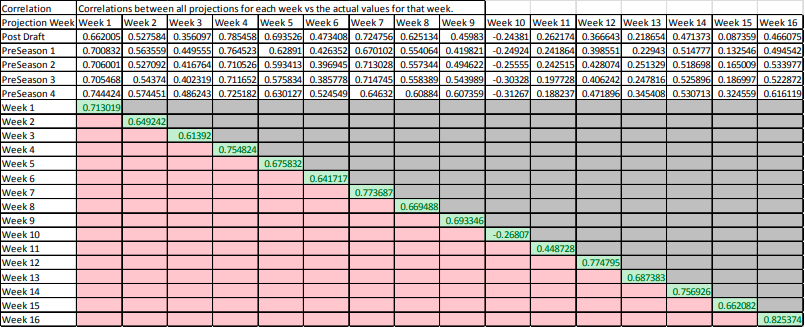

In [ ]:
# Fig 2
display(Image('../figure2.png'))

### What figure would you add?
I would add a figure that graphs correlation over time for each week of the NFL season. For instance, the dataset includes all correlations for each week, all the way from Week 1 to Week 16 of the NFL season. The y-axis for this graph would be correlation coefficient, and the x-axis would be week of the NFL season. The datapoints would be the correlation coefficients for each position group (QB/DST) and week of the NFL Season.

For instance:
Week 1, the QB projection correlation was 0.713, the D/ST correlation was 0.442
Week 2, the QB projection correlation was 0.649, the D/ST correlation was -.549

This figure would demonstrate:
1. The accuracy of each position's projections over time
2. Whether one position had signficantly more accurate projections than the other (values)
3. Whether one position's projection accuracy improved significantly more than the other over the course of the season (slope)

It would also do so in a much neater way than the table shown in figure 2, which would increase the reader's comprehension of one of the main takeaways from the study (QB projections tend to be more accurate the D/ST projections using this model)

## Section 3
#### Data format
Since this is a .xlsx file, the delimeter for this data is a comma\
(It's more complicated than that because excel files are really zip files with some specific formatting).\
In short, it's an Excel spreadsheet

In [ ]:
# QBs
print('Number of rows (QBs):', QB.shape[0])
print('Number of columns (QBs):', QB.shape[1])

print()

# DSTs
print('Number of rows: (DSTs):', DST.shape[0])
print('Number of columns: (DSTs):', DST.shape[1])

Number of rows (QBs): 587
Number of columns (QBs): 29

Number of rows: (DSTs): 480
Number of columns: (DSTs): 27


# Part 2
#### Data can be downloaded [here](https://digital.wpi.edu/concern/student_works/5712m8080?locale=en)
1. Scroll to the bottom of the page
2. Download the ASLMQP.zip file into a `Data` directory inside of your parent directory
3. Unzip it into the `Data` directory!

The sheet you're looking for is `Accuscore Evaluation.xlsx`

In [ ]:
# import packages and dataset
import pandas as pd

# These were imported for each fantasy football position type (QB or DST)
QB = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name='QB Projections')
DST = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name= 'DST Projections')

# Data Cleaning

In [ ]:
# Remove duplicate columns (PLAYERID/ESPNID is simply an alias for PLAYER)
QB = QB.drop(['PLAYERID', 1], axis=1)
# Since defenses are played per team, as long as we have the TEAM data, we know what the name of the player is
DST = DST.drop(['ESPNID', 'PLAYER'], axis=1)
# Rename ORDER column to WEEK for clarity (since order describes the week of the NFL season)
QB = QB.rename(columns={'ORDER':'WEEK'})
DST = DST.rename(columns={'ORDER':'WEEK'})


# Remove Ben Roethelisberger's and Andrew Luck's bye weeks (Week 4), since the authors forgot to
ben_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Ben Roethlisberger')).astype(int).idxmax()
luck_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Andrew Luck')).astype(int).idxmax()
QB = QB.drop([ben_bye, luck_bye], axis=0)


In [ ]:
# Print out the shape of each dataset
print(QB.shape)
print(DST.shape)

(585, 27)
(480, 25)


#### How does the shape of each dataset relate to the number of features and observations in that dataset?
- QBs
    - There are 32 teams in the NFL
    - There were 585 datapoints for projections on 39 different quarterbacks across the 16-week 2012 season (15 games played for each player + 1 bye week)
    - The reason there are more than 32 quarterbacks is because multiple teams had more than two quarterbacks that started at least 1 game across the season
    - Thus, there are 39*15 = 585 rows in this dataset
- DSTs
    - There are 32 teams, and thus 32 team defenses, in the NFL
    - There are 480 datapoints for projections on these 32 team defeneses across the 16-week 2013 season
    - This is because each team gets a __bye week__ where they don't play. 
    - For defenses, these weeks were excluded from the dataset. Therefore, there are 32 teams * 15 weeks = 480 datapoints
- Features
    - There are 21 projections (16 in-season projections + 5 preseason ones) + a 'variation' column that measures the variance in projections from week to week for each player
    - Other columns track player, team, and week information

In [ ]:
# Feature 1: Player/Team
# Expectations included in the description above
print(QB['PLAYER'].describe())
print()
print(DST['TEAM'].describe())
print()

# Feature 2: Actuals (Fantasy points scored)
# I would expect quarterbacks to score, on average, 15 fantasy points. All rows should have a value for this measure
print(QB['Actuals'].describe())
# In actuality, they scored about 13 fantasy points on average, which is lower than I expected.
print()
# I would expect team defenses to score, on average, 8 fantasy points. All rows should have a value for this measure
print(DST['Actuals'].describe())
# In actuality, they scored about 10 fantasy points on average, which is higher than I expected.

count                585
unique                39
top       Peyton Manning
freq                  15
Name: PLAYER, dtype: object

count     480
unique     32
top       ATL
freq       15
Name: TEAM, dtype: object

count    585.000000
mean      12.507316
std        9.307847
min       -4.840000
25%        3.840000
50%       13.040000
75%       18.860000
max       39.400000
Name: Actuals, dtype: float64

count    480.000000
mean      10.543750
std        9.213664
min       -4.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       51.000000
Name: Actuals, dtype: float64


## Section 3: Figure 1 (Player/Team)
#### Describe what kind of visualization you want to make.
I would like to make a histogram of how many observations occur for each player in the sample.
#### Why is this appropriate for this feature and data set?
This is appropriate as a way to verify that there are 15 observations per player, and track how many observations occur for each player in the sample
#### How will the visualization provide insight into the data?
This figure adds more context to the describe output, since every player in the entire sample has 15 observations. This is a key insight, especially considering that not all of the QBs in the sample played or were expected to play in all 15 of their games.
- Blaine Gabbert, for example, only played in 10 games in 2012

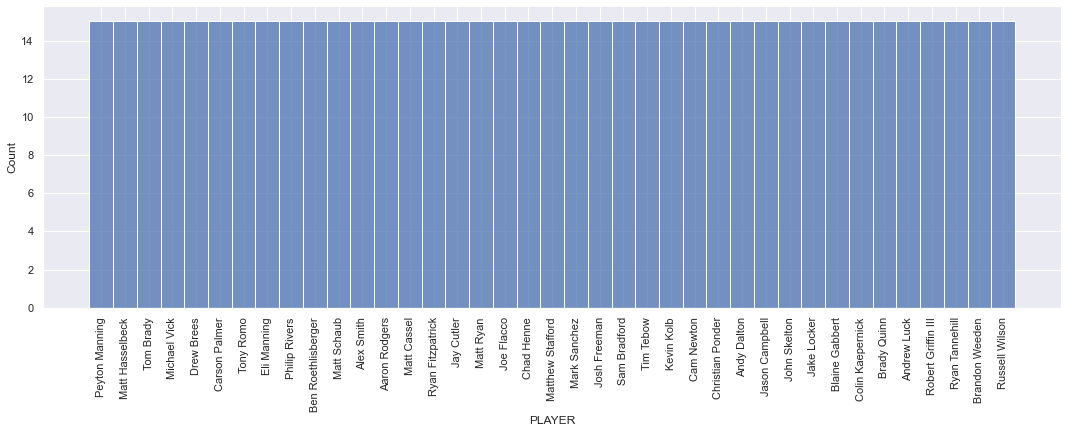

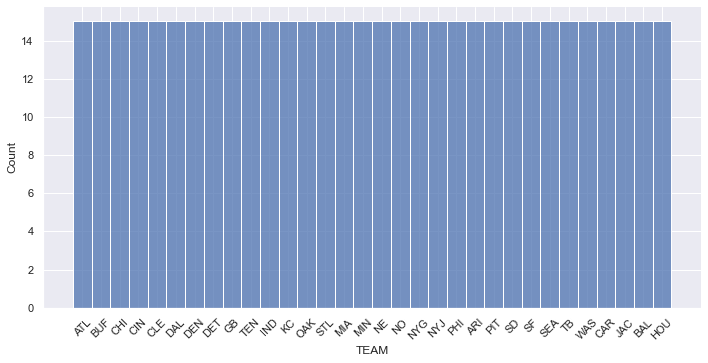

In [ ]:
# Provide code and explain your code to make the visualization.

# Import seaborn and set the theme
import seaborn as sns
sns.set_theme()
# Make a very wide plot, listing each QB on the x-axis with their name rotated 90° for readability
# The counts axis will represent the number of games tracked for that QB
bar_QBs = sns.displot(data=QB, x='PLAYER', aspect=3)
display(bar_QBs.set_xticklabels(rotation=90))

# Make a wide plot, listing each D/ST on the x-axis with their name rotated 45° for readability
# The counts axis will represent the number of games tracked for that D/ST
bar_DSTs = sns.displot(data=DST, x='TEAM', aspect=2)
display(bar_DSTs.set_xticklabels(rotation=45))


#### Interpret the visualization: compare it to the "describe" function output from Section 2
This figure confirms what the `describe` function's output only implies; if the most frequently observed quarterback (Peyton Manning) was observed 15 times, and there are 39 unique quarterbacks and 585 total samples, then each quarterback must have 585/39 = 15 observations. 
#### Explain what insight into the data you can make with the visualization. 
All quarterbacks in the model were included for all weeks, regardless of whether or not they were projected to play.
#### Describe how your visualization relates to one of the hypotheses or figures from the paper.
If the authors were trying to evaluate how good their model was at predicting fantasy points scored, weeks where a player was injured (and thus would have been projected to score 0 points)
are just free wins for the model, and would artificially boost any measure of how good the model was at predicting fantasy points

## Section 3: Figure 2 (Actual Fantasy Points Scored)
#### Describe what kind of visualization you want to make.
I would like to make a histogram of how many fantasy points are scored for QBs and D/STs.
#### Why is this appropriate for this feature and data set?
This plot is appropriate fantasy points are a numerical metric that can be divided up into bins to determine how good (or bad) a performance was, relative to the average
#### How will the visualization provide insight into the data?
This figure will provide a baseline for what a `good` fantasy game was for each position in 2012, which will help us qualitatively evaluate the model's projections
- For example, if the average defense scored 10 fantasy points, and most defenses scored less than 15 points, it would be highly unlikely that the model would project a defense to score more than 15 fantasy points

In [1]:
# Provide code and explain your code to make the visualization.
# Create histograms that sort scoring into 10 bins and display them
point_QBs = sns.displot(data=QB, x='Actuals', bins=10)
display(point_QBs)
point_DSTs = sns.displot(data=DST, x='Actuals', bins=10)
display(point_DSTs)

NameError: name 'sns' is not defined

#### Interpret the visualization: compare it to the "describe" function output from Section 2
This figure is a visualization of the `describe` function's output; both QB and D/ST scoring are right-skewed, with 75% of the data for QB and D/ST lying below the half of the maximum score at each position
- For QBs, the maximum score (from the describe output) was **39.4** fantasy points. The 75th percentile score was **18.86** fantasy points
- For D/STs, the maximum score (from the describe output) was **51** fantasy points. The 75th percentile score was **15** fantasy points 
#### Explain what insight into the data you can make with the visualization. 
Quarterback fantasy point scoring follows more of a Normal distribution (plus a bunch of 0 scores for weeks where those QBs didn't play). D/ST fantasy point scoring, however, is truly right-skewed. The majority of fantasy defenses score below ~12 fantasy points.
#### Describe how your visualization relates to one of the hypotheses or figures from the paper.
Knowing how fantasy point scoring is distributed for each position can help the authors find appropriate models to predict future fantasy point scoring at each position. It's also helpful to know that the fantasy points scored distribution is different for different positions. That suggests that a different model should probably be used to project each position's future fantasy points.